# 使用说明

本案例使用的数据已经上传到本人github代码库：https://github.com/aaronlou/DataScienceProject/tree/master/Data/watermelon3_0.csv

----广告时间-----   
欢迎关注本人以下创作栏目：  
微信公众号：《实战数据分析挖掘》funCodingFunLife   
知乎专栏：https://www.zhihu.com/people/cong-lin-xi-ren-wang/posts  
CSDN博客专栏：https://me.csdn.net/a_step_further  

# 导入数据，预处理

In [108]:
import pandas as pd
data = pd.read_csv("/Users/lousiyuan/dataScience/gitSpace/DataScienceProject/Data/watermelon3_0.csv",header=None)  #这一句要替换为自己电脑上的文件路径
data.columns = ["index","color","root","noise","texture","navel","touch","density","sugar","class"]

In [109]:
data[:5]

,index,color,root,noise,texture,navel,touch,density,sugar,class
0,1,青绿,蜷缩,浊响,清晰,凹陷,硬滑,0.697,0.460,是
1,2,乌黑,蜷缩,沉闷,清晰,凹陷,硬滑,0.774,0.376,是
2,3,乌黑,蜷缩,浊响,清晰,凹陷,硬滑,0.634,0.264,是
3,4,青绿,蜷缩,沉闷,清晰,凹陷,硬滑,0.608,0.318,是
4,5,浅白,蜷缩,浊响,清晰,凹陷,硬滑,0.556,0.215,是


将数据拆成特征向量与目标变量

In [110]:
X = data[["color","root","noise","texture","navel","touch","density","sugar"]]
y = data[["class"]]

# 先做一个简单的决策树

拆分数据

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=10,test_size=0.20)

# 模型训练

### 导入模型

sklearn中关于决策树算法package的使用文档详见:  
https://scikit-learn.org/stable/modules/tree.html#classification    
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [112]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'entropy')  #这里有很多参数可以设置 其中 criterion{“gini”, “entropy”}, default=”gini”  

### 对训练数据进行预处理
sklearn中对类别型变量进行编码详见：https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features

In [113]:

#对特征变量进行 ONE-HOT-ENCODING
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories="auto",handle_unknown = 'ignore')

#对类别型的变量进行 ONE-HOT-ENCODING
X_train_cate = X_train[["color","root","noise","texture","navel","touch"]]
ohe = ohe.fit(X_train_cate)
X_train_cate_ohe = pd.DataFrame(ohe.transform(X_train_cate).toarray())


# #对连续型变量无需进行标准化
# X_train_continous = X_train[["density","sugar"]]
# from sklearn import preprocessing
# scaler = preprocessing.StandardScaler().fit(X_train_continous)
# X_train_continous_scaled = pd.DataFrame(scaler.transform(X_train_continous))

X_train_continous = pd.DataFrame(X_train[["density","sugar"]]).reset_index(drop=True)  #注意这里对索引进行重新排序，否则后面合并的时候会出现错位

#再跟原来的特征变量合并到一起
X_train_concat = pd.concat([X_train_cate_ohe,X_train_continous],axis=1)
# print(X_train_concat[:3])

#对标签变量进行0-1编码，对于二分类，可以使用LabelBinarizer，但笔者更喜欢直接用map来显示转换
y_train_label = pd.DataFrame(y_train["class"].map({"是":1,"否":0}))

### 下面就可以开始训练数据了

In [114]:
model = clf.fit(X_train_concat,y_train_label)

### 训练完成就可以预测了

#### 注意也要先对数据进行一些预处理

In [115]:
# 先对测试数据也进行一些数据预处理，注意要直接使用那些用于处理训练数据的转换操作实例，可以直接调用在训练数据fit好的算子
X_test_cate = X_test[["color","root","noise","texture","navel","touch"]]
#ohe是上面已经在训练数据上fit后的算子，这里可以直接调用
X_test_cate_ohe = pd.DataFrame(ohe.transform(X_test_cate).toarray())


X_test_continous = pd.DataFrame(X_test[["density","sugar"]]).reset_index(drop=True)

#合并
X_test_concat = pd.concat([X_test_cate_ohe,X_test_continous],axis=1)


#对标签变量进行0-1编码，对于二分类，可以使用LabelBinarizer，但笔者更喜欢直接用map来显示转换
y_test_label = pd.DataFrame(y_test["class"].map({"是":1,"否":0}))


#### 然后就可以调用predict了

In [116]:
y_predict = model.predict(X_test_concat)
print(y_predict)
print(y_test_label)

[0 1 0 0]
    class
5       1
3       1
14      0
7       1


### 评估模型结果 

In [117]:
from sklearn.metrics import accuracy_score
ratio = accuracy_score(y_test_label,y_predict)
print("二分类准确率: %f" % (ratio))

二分类准确率: 0.500000


### 可以把上述过程画出来哦！

[Text(133.92000000000002, 190.26, 'X[18] <= 0.126\nentropy = 0.961\nsamples = 13\nvalue = [8, 5]'),
 Text(66.96000000000001, 135.9, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(200.88000000000002, 135.9, 'X[5] <= 0.5\nentropy = 0.954\nsamples = 8\nvalue = [3, 5]'),
 Text(133.92000000000002, 81.53999999999999, 'X[14] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(66.96000000000001, 27.180000000000007, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(200.88000000000002, 27.180000000000007, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(267.84000000000003, 81.53999999999999, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]')]

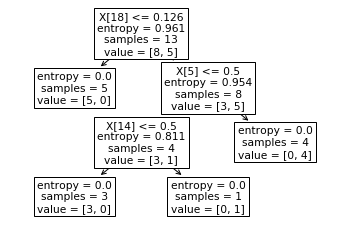

In [118]:
tree.plot_tree( clf.fit(X_train_concat,y_train_label)) 

也可以使用graphviz来进行可视化，但该软件安装起来相当棘手，大家可以自行尝试，这里不做演示。

### 还可以量化每个特征的重要性~

In [119]:
from sklearn import metrics
print(model.feature_importances_)

[0.         0.         0.         0.         0.         0.35133906
 0.         0.         0.         0.         0.         0.
 0.         0.         0.25969052 0.         0.         0.
 0.38897042]


# THE END